In [1]:
print('Hola Mundo')

Hola Mundo


Se importaron las librerias necesarias para el trabajo 

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from ydata_profiling import ProfileReport
from datetime import date, timedelta, datetime


Se lee el dataset ya corregido con la limpieza realizada

In [3]:
df=pd.read_csv('df_arreglado2.csv')

In [4]:
df.head()

,Unnamed: 0,fecha,hora,operador,tipo_de_avion,ruta,pasajeros_a_bordo,personal_a_bordo,total_a_bordo,pasajeros_fallecidos,personal_fallecido,ground,total_fallecidos,summary
0,0,1908-9-17,17:18:00,Military - U.S. Army,Wright Flyer III,"Fort Myer, Virginia",1.0,1.0,2.0,1.0,0.0,0.0,1,"During a demonstration flight, a U.S. Army fly..."
1,1,1909-9-07,NaN,NaN,Wright Byplane,"Juvisy-sur-Orge, France",0.0,1.0,1.0,0.0,0.0,0.0,1,Eugene Lefebvre was the first pilot to ever be...
2,2,1912-7-12,06:30:00,Military - U.S. Navy,Dirigible,"Atlantic City, New Jersey",0.0,5.0,5.0,0.0,5.0,0.0,5,First U.S. dirigible Akron exploded just offsh...
3,3,1913-8-06,NaN,Private,Curtiss seaplane,"Victoria, British Columbia, Canada",0.0,1.0,1.0,0.0,1.0,0.0,1,The first fatal airplane accident in Canada oc...
4,4,1913-9-09,18:30:00,Military - German Navy,Zeppelin L-1 (airship),Over the North Sea,NaN,NaN,20.0,NaN,NaN,0.0,14,The airship flew into a thunderstorm and encou...


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            5000 non-null   int64  
 1   fecha                 5000 non-null   object 
 2   hora                  3504 non-null   object 
 3   operador              4990 non-null   object 
 4   tipo_de_avion         4989 non-null   object 
 5   ruta                  4995 non-null   object 
 6   pasajeros_a_bordo     4787 non-null   float64
 7   personal_a_bordo      4789 non-null   float64
 8   total_a_bordo         4991 non-null   float64
 9   pasajeros_fallecidos  4773 non-null   float64
 10  personal_fallecido    4773 non-null   float64
 11  ground                4964 non-null   float64
 12  total_fallecidos      5000 non-null   int64  
 13  summary               4945 non-null   object 
dtypes: float64(6), int64(2), object(6)
memory usage: 547.0+ KB


Definimos las columnas con las que vamos a trabajar en el EDA en esta primera aproximacion 

In [8]:

columns = ['fecha', 'hora','tipo_de_avion', 'ruta','total_fallecidos']


Cargamos el DataFrame solo con esas columnas

In [9]:
df_arreglado2= pd.read_csv('df_arreglado2.csv', usecols = columns)
df

,Unnamed: 0,fecha,hora,operador,tipo_de_avion,ruta,pasajeros_a_bordo,personal_a_bordo,total_a_bordo,pasajeros_fallecidos,personal_fallecido,ground,total_fallecidos,summary
0,0,1908-9-17,17:18:00,Military - U.S. Army,Wright Flyer III,"Fort Myer, Virginia",1.0,1.0,2.0,1.0,0.0,0.0,1,"During a demonstration flight, a U.S. Army fly..."
1,1,1909-9-07,NaN,NaN,Wright Byplane,"Juvisy-sur-Orge, France",0.0,1.0,1.0,0.0,0.0,0.0,1,Eugene Lefebvre was the first pilot to ever be...
2,2,1912-7-12,06:30:00,Military - U.S. Navy,Dirigible,"Atlantic City, New Jersey",0.0,5.0,5.0,0.0,5.0,0.0,5,First U.S. dirigible Akron exploded just offsh...
3,3,1913-8-06,NaN,Private,Curtiss seaplane,"Victoria, British Columbia, Canada",0.0,1.0,1.0,0.0,1.0,0.0,1,The first fatal airplane accident in Canada oc...
4,4,1913-9-09,18:30:00,Military - German Navy,Zeppelin L-1 (airship),Over the North Sea,NaN,NaN,20.0,NaN,NaN,0.0,14,The airship flew into a thunderstorm and encou...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,5003,2021-3-28,18:35:00,Soloy Helicopters,Eurocopter AS350B3 Ecureuil,"Near Butte, Alaska",5.0,1.0,6.0,4.0,1.0,0.0,5,The sightseeing helicopter crashed after missi...
4996,5004,2021-5-21,18:00:00,Military - Nigerian Air Force,Beechcraft B300 King Air 350i,"Near Kaduna, Nigeria",7.0,4.0,11.0,7.0,4.0,0.0,11,"While on final approach, in poor weather condi..."
4997,5005,2021-6-10,08:00:00,Military - Myanmar Air Force,Beechcraft 1900D,"Near Pyin Oo Lwin, Myanmar",12.0,2.0,14.0,11.0,1.0,0.0,12,The plane was carrying military personnel and ...
4998,5006,2021-7-04,11:30:00,Military - Philippine Air Force,Lockheed C-130H Hercules,"Patikul, Sulu, Philippines",88.0,8.0,96.0,NaN,NaN,3.0,50,"While attempting to land at Jolo Airport, the ..."


Eliminamos las instancias que tienen un nan en alguno de los registros.


In [10]:
df_arreglado2.dropna(inplace=True)
df_arreglado2


,fecha,hora,tipo_de_avion,ruta,total_fallecidos
0,1908-9-17,17:18:00,Wright Flyer III,"Fort Myer, Virginia",1
2,1912-7-12,06:30:00,Dirigible,"Atlantic City, New Jersey",5
4,1913-9-09,18:30:00,Zeppelin L-1 (airship),Over the North Sea,14
5,1913-10-17,10:30:00,Zeppelin L-2 (airship),"Near Johannisthal, Germany",28
6,1915-3-05,01:00:00,Zeppelin L-8 (airship),"Tienen, Belgium",17
...,...,...,...,...,...
4995,2021-3-28,18:35:00,Eurocopter AS350B3 Ecureuil,"Near Butte, Alaska",5
4996,2021-5-21,18:00:00,Beechcraft B300 King Air 350i,"Near Kaduna, Nigeria",11
4997,2021-6-10,08:00:00,Beechcraft 1900D,"Near Pyin Oo Lwin, Myanmar",12
4998,2021-7-04,11:30:00,Lockheed C-130H Hercules,"Patikul, Sulu, Philippines",50


En una primera aproximacion hacemos un grafico general

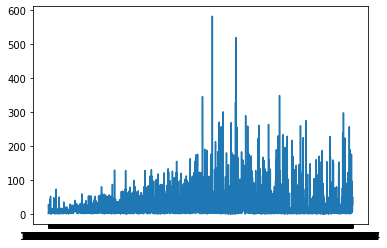

In [9]:
plt.plot(df_arreglado2['fecha'], df_arreglado2['total_fallecidos'])

Asi como esta esto no nos dice mucho , probaremos otros graficos y ademas relacionaremos columna por columna de las que nos importan para el analisis

Ahora vamos a ver otra aproximacion a los datos con otra libreria 

In [10]:
ProfileReport(df_arreglado2)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [11]:
x = df_arreglado2.fecha.values
y = df_arreglado2.total_fallecidos.values

In [12]:
type(x)

numpy.ndarray

Hicimos una evaluacion del tipo de aparatos involucrados en los accidentes

In [8]:
tipo_avion= pd.Series(df['tipo_de_avion'].value_counts())

In [9]:
tipo_avion

Douglas DC-3                                333
de Havilland Canada DHC-6 Twin Otter 300     81
Douglas C-47A                                70
Douglas C-47                                 63
Douglas DC-4                                 41
                                           ... 
Convair CV-340-59                             1
Vickers Viscount 759D                         1
H-21B                                         1
Avro 685 York C1                              1
Antonov An 26B-100                            1
Name: tipo_de_avion, Length: 2465, dtype: int64

Graficamos los 5 modelos de avion que mas participaron  en accidentes 

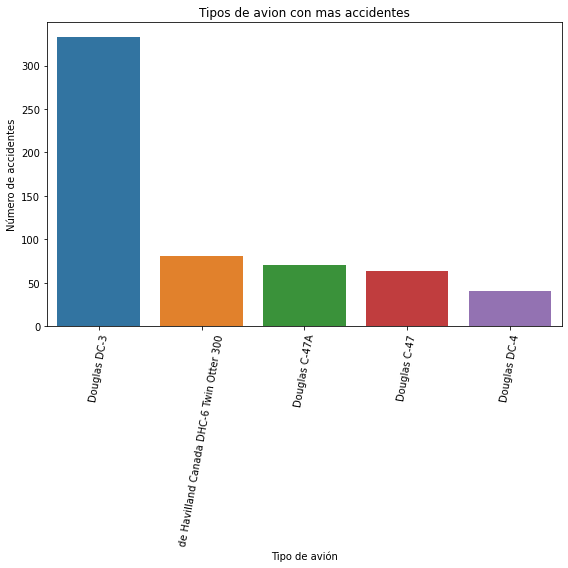

In [20]:
plt.figure(figsize=(8,8))

tipo_avion = df['tipo_de_avion'].value_counts().head(5)


ax = sns.barplot(x=tipo_avion.index, y=tipo_avion.values)
ax.set_xticklabels(ax.get_xticklabels(), rotation=80)  

plt.xlabel('Tipo de avión')
plt.ylabel('Número de accidentes')
plt.title('Tipos de avion con mas accidentes')

plt.tight_layout()
plt.show()

Veremos ahora las rutas con mas accidentes en esos años, si es que estas existen

In [22]:
ruta_p= pd.Series(df['ruta'].value_counts())

In [47]:
ruta_p

Moscow, Russia                            16
Manila, Philippines                       15
New York, New York                        14
Cairo, Egypt                              13
Sao Paulo, Brazil                         13
                                          ..
Near Roccatamburo di Poggiodomo, Italy     1
Fort Collins, Colorado                     1
Guadarrama Mountains, Spain                1
Tashkent, Uzbekstan                        1
Palana, Russia                             1
Name: ruta, Length: 4118, dtype: int64

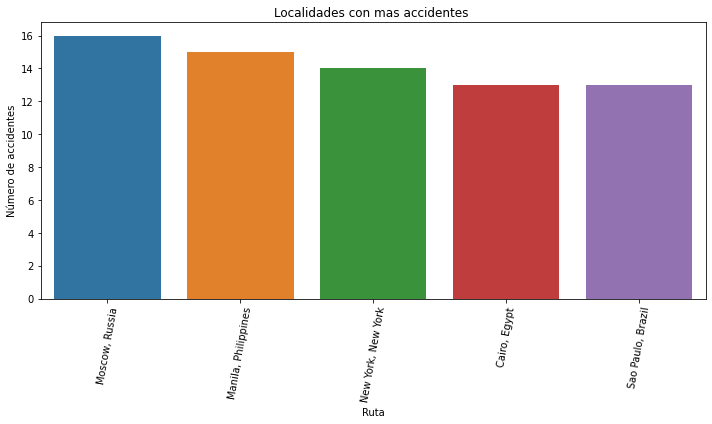

In [23]:
plt.figure(figsize=(10, 6))

ruta_p = df['ruta'].value_counts().head(5)
ax = sns.barplot(x=ruta_p.index, y=ruta_p.values)
ax.set_xticklabels(ax.get_xticklabels(), rotation=80)  # Rotar las etiquetas del eje x

plt.xlabel('Ruta')
plt.ylabel('Número de accidentes')
plt.title('Localidades con mas accidentes ')

plt.tight_layout()
plt.show()

Investigamos la columna summary

In [24]:
causas_p= pd.Series(df['summary'].value_counts())

In [25]:
causas_p

Crashed under unknown circumstances.                                                                                                                                                                                                                                                    9
Crashed while en route.                                                                                                                                                                                                                                                                 8
Crashed while attempting to land.                                                                                                                                                                                                                                                       7
Crashed during takeoff.                                                                                                                                   

Las graficamos

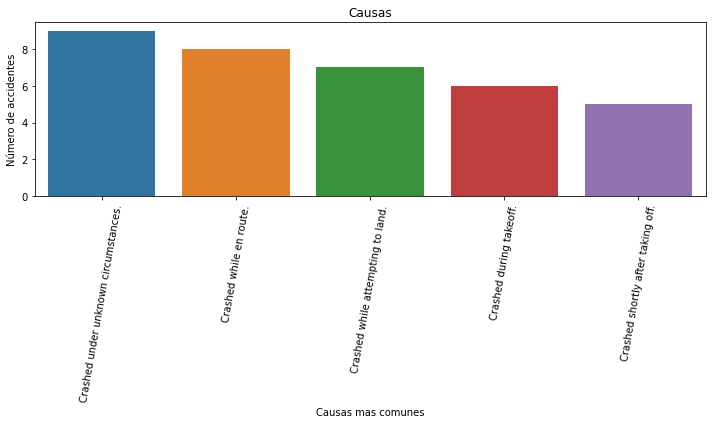

In [26]:
plt.figure(figsize=(10, 6))

causas_p = df['summary'].value_counts().head(5)


ax = sns.barplot(x=causas_p.index, y=causas_p.values)
ax.set_xticklabels(ax.get_xticklabels(), rotation=80)  # Rotar las etiquetas del eje x

plt.xlabel('Causas mas comunes')
plt.ylabel('Número de accidentes')
plt.title('Causas')

plt.tight_layout()
plt.show()

Accidentes por año 

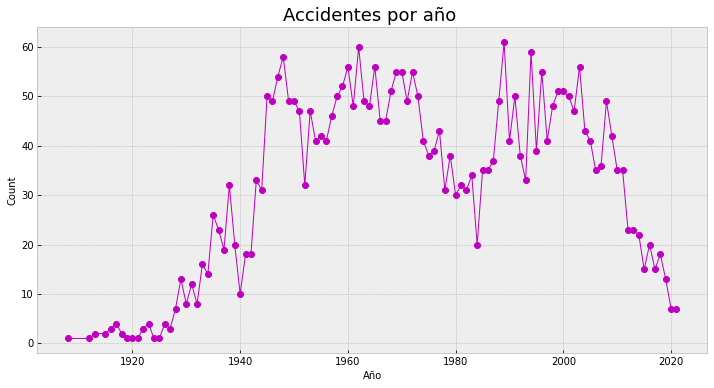

In [9]:
df_arreglado2['fecha'] = pd.to_datetime(df_arreglado2['fecha'], errors='coerce')
Temp = df_arreglado2.groupby(df_arreglado2.fecha.dt.year)[['fecha']].count()
Temp = Temp.rename(columns={"fecha": "Count"})

plt.figure(figsize=(12,6))
plt.style.use('bmh')
plt.plot(Temp.index, Temp['Count'], color='m', marker = "o", linewidth=1)
plt.xlabel('Año', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.title('Accidentes por año ', loc='Center', fontsize=18)
plt.show()






TASA DE SINIESTRALIDAD

Tasa global de siniestralidad: Accidentes/Millon de vuelos

Se utilizo el promedio de vuelos anuales dado por IATA en sus informes , extrapolando los datos faltantes para tener un valor aproximado con el minimo error.
Dado que la tasa se redujo en 2022 respecto al 2021 se propone una reduccion de 0.3 por millon para los proximos 5 años.

In [26]:
df_arreglado2['fecha'] = pd.to_datetime(df_arreglado2['fecha'], errors='coerce')
Temp1 = df_arreglado2.groupby(df_arreglado2.fecha.dt.year)[['fecha']].count()
Temp1 = Temp1.rename(columns={"fecha": "Count"})
Temp2= Temp1/15000000*1000000


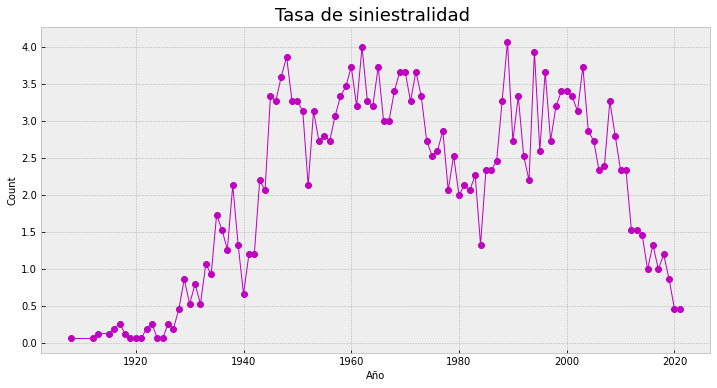

In [27]:
plt.figure(figsize=(12,6))
plt.style.use('bmh')
plt.plot(Temp2.index, Temp2['Count'], color='m', marker = "o", linewidth=1)
plt.xlabel('Año', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.title('Tasa de siniestralidad ', loc='Center', fontsize=18)
plt.show()

In [20]:
Temp1.tail(10)


,Count
fecha,
2012,23
2013,23
2014,22
2015,15
2016,20
2017,15
2018,18
2019,13
2020,7


In [28]:
tasa_siniestralidad= 7/15000000*1000000

In [29]:
print(tasa_siniestralidad)

0.4666666666666667


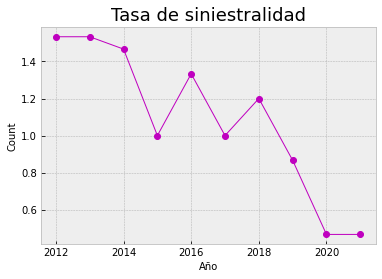

In [30]:
last_ten_years = Temp2.index[-10:]

plt.plot(last_ten_years, Temp2['Count'][-10:], color='m', marker='o', linewidth=1)
plt.xlabel('Año', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.title('Tasa de siniestralidad', loc='Center', fontsize=18)
plt.show()

Se Busco señalizar con esta grafica la baja de vuelos durante la pandemia, se contaban con datos hasta el 2021 pero los datos del 2022 estan disponibles ya en el sitio de IATA (Asociacion de transporte aereo internacional).Claramente se ve alli la drastica baja